In [89]:
! pip install -q kaggle  # install the kaggle pack for loading the dataset from kaggle

In [ ]:
from google.colab import files
files.upload()    ## upload json file from kaggle 

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"roshanavhad","key":"dbeeb3169cca76e0abd1566025b33934"}'}

In [ ]:
!mkdir ~/.kaggle   # make kaggle directory 

In [ ]:
! cp kaggle.json ~/.kaggle/    # make a copy

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json  # change access permission

In [ ]:
 ! kaggle datasets list  # to display the list of the dataset

ref                                                             title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ahsan81/hotel-reservations-classification-dataset               Hotel Reservations Dataset                        480KB  2023-01-04 12:50:31           3750        138  1.0              
senapatirajesh/netflix-tv-shows-and-movies                      Latest Netflix TV shows and movies                  1MB  2023-01-14 17:03:12            715         23  0.88235295       
thedevastator/global-fossil-co2-emissions-by-country-2002-2022  Emissions by Country, 2002-2022                   621KB  2023-01-02 20:10:36           1869         63  1.0              
johnny1994/divorce-rates-data-should-you-get-married            Divorc

In [ ]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess   # to download the dataset

100% 427M/428M [00:03<00:00, 135MB/s]
100% 428M/428M [00:03<00:00, 133MB/s]


In [ ]:
!unzip toronto-emotional-speech-set-tess    # to extract the dataset files

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [ ]:
import pandas as pd   #data processing 
import numpy as np  #no of operation,vector ,numerical operation (linear algebra)
import os # to add the file 
import seaborn as sns   #visualisation of audio file
import matplotlib.pyplot as plt  # for generate pyplot
import librosa    # librosa is used for music and audio analysis 
import librosa.display   # the function constructs a plot which adaptively switches between a raw samples-based view of the signal (matplotlib.pyplot.step) and an amplitude envelope view of the signal 
## librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later

from IPython.display import Audio   # used for interactive computing # to display the audio files 
import warnings   # import warnings library 
warnings.filterwarnings('ignore')
print("Module Imported") 

Module Imported


In [ ]:
paths=[]
labels=[]

for dirname, _, filenames in os.walk('/content/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label=filename.split('_')[-1]   # to split the file name and get the emotion part 
        label=label.split('.')[0]   # for taking 1st emotion on 0th index
        labels.append(label.lower()) #convert emotion to lower case
       

In [ ]:
len(paths) # length of the data set 

2800

In [ ]:
paths[:5]   #print 1st five entry for checking data set validation.

['/content/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_should_ps.wav',
 '/content/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_time_ps.wav',
 '/content/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_witch_ps.wav',
 '/content/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_kill_ps.wav',
 '/content/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_merge_ps.wav']

In [ ]:
labels[:5]   #print emotion

['ps', 'ps', 'ps', 'ps', 'ps']

In [ ]:
#Create a DataFrame
df=pd.DataFrame()  #data library
df['speech']=paths  #store speech in path
df['label']= labels   #store emotiom in lable
df[:5]

,speech,label
0,/content/TESS Toronto emotional speech set dat...,ps
1,/content/TESS Toronto emotional speech set dat...,ps
2,/content/TESS Toronto emotional speech set dat...,ps
3,/content/TESS Toronto emotional speech set dat...,ps
4,/content/TESS Toronto emotional speech set dat...,ps


In [ ]:
df['label'].value_counts()    # count the frequency of each emotions

ps         400
sad        400
neutral    400
disgust    400
fear       400
happy      400
angry      400
Name: label, dtype: int64

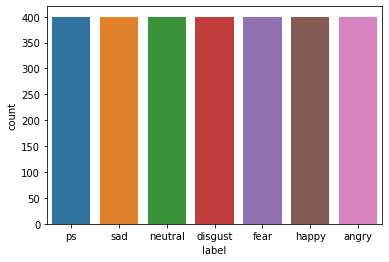

In [ ]:
sns.countplot(df['label'])#print count graph of each emotion

**This is only to visualize the spectogram and waveform of the audio files**

In [ ]:
def waveplot(data,sr,emotion):    # define waveplot function to plot the waveform the emotion 
    plt.figure(figsize=(10,4))  # to fix the size of the figure
    plt.title(emotion,size=20)   # to set the title of the emotion 
    librosa.display.waveshow(data,sr=sr)  #  To plot the amplitude envelope of a waveform  # sr is the sampling rate 
    plt.show()  #finally display the plot
def spectogram(data,sr,emotion):       
    x=librosa.stft(data)   # # to short-time fourier transform  (STFT)
    # stft represents a signal in the time-frequency domain by computing discrete fourier transform(DFT) over
    # short overlapping windows 
    xdb=librosa.amplitude_to_db(abs(x))    # this converts amplitude spectogram to dB-scaled spectrogram 
    plt.figure(figsize=(11,4))  # define the size of the figure 
    plt.title(emotion,size=20)   # Give the title of the emotion 
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')  # display spectogram  
    plt.colorbar()
      # this we have done using pyplot interface 
    plt.savefig("emotion.png")

In [ ]:
emotion='fear'   # assign emotion value
path=np.array(df['speech'][df['label']==emotion])[0]    ##
data,sampling_rate=librosa.load(path)   # load an audio file as a floating point time series 
## audio will be automatically resamples to given rate  

waveplot(data,sampling_rate,emotion)  #call the waveplot function 
spectogram(data,sampling_rate,emotion)  # calling the spectogram function 
Audio(path)    

NameError: ignored

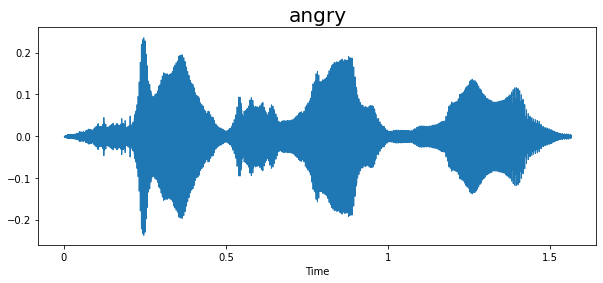

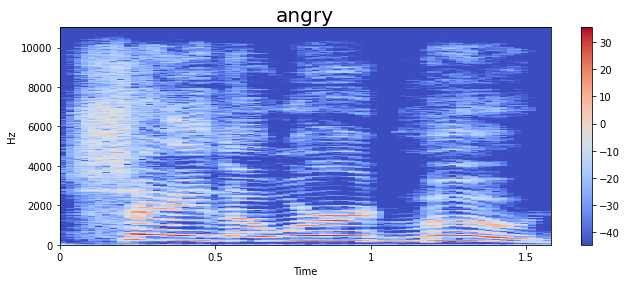

In [ ]:
emotion='angry'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

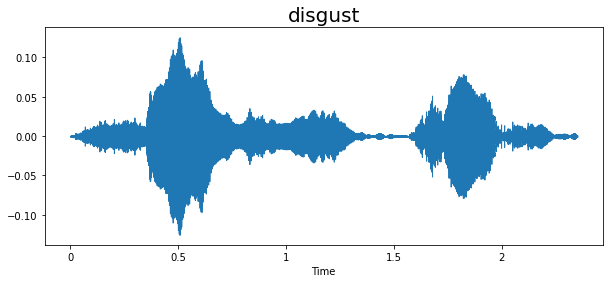

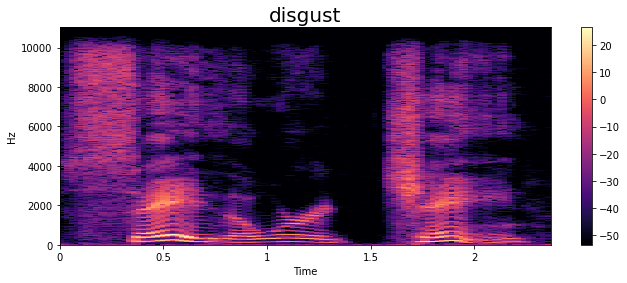

In [ ]:
emotion='disgust'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

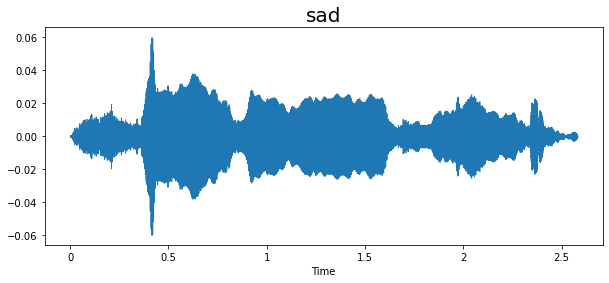

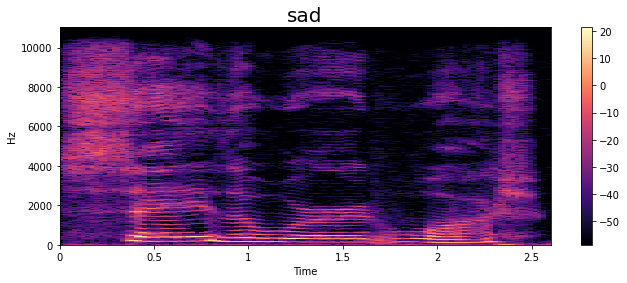

In [ ]:
emotion='sad'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

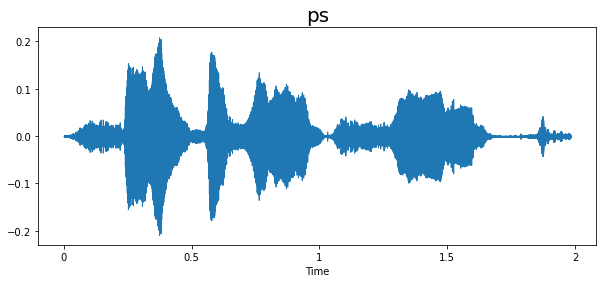

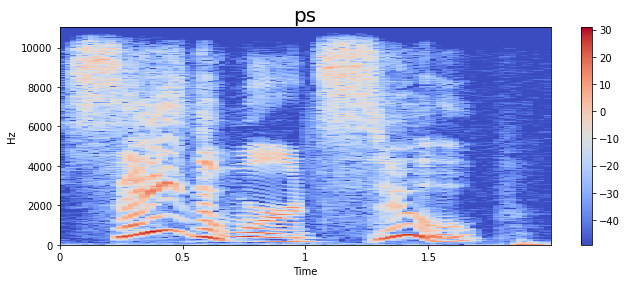

In [ ]:
emotion='ps'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

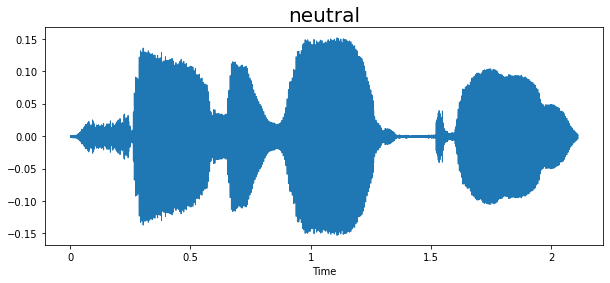

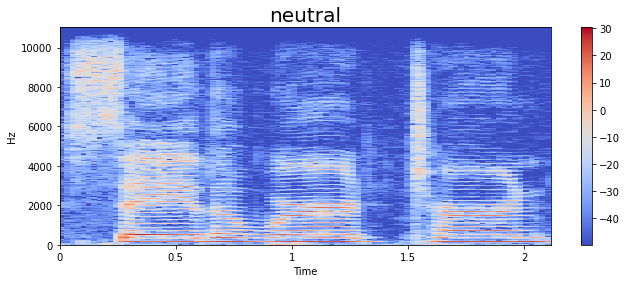

In [ ]:
emotion='neutral'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

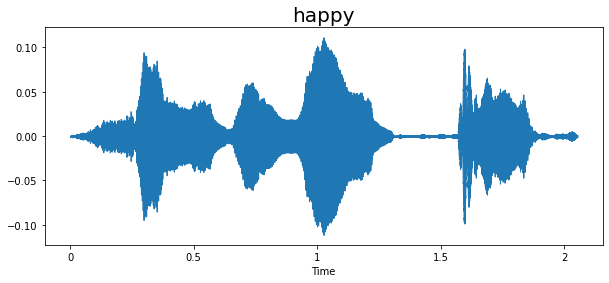

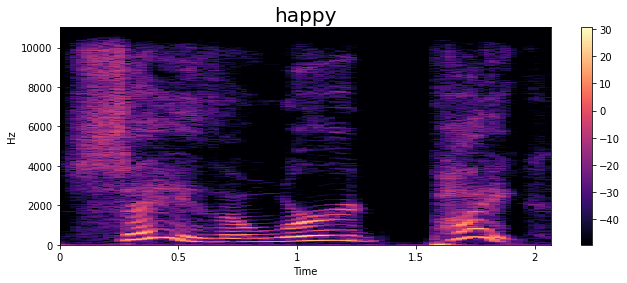

In [ ]:
emotion='happy'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

***Feature extraction ***

In [ ]:
#Mel-frequency cepstral coefficients (MFCCs)

def extract_mfcc(filename):  # feature extraction function 
    y, sr = librosa.load(filename,duration= 3, offset =0.5)   #Load an audio file as a floating point time series.
    # set the default time duration of audio file as 3 sec
    mfcc = np.mean(librosa.feature.mfcc(y = y ,sr= sr, n_mfcc = 39).T,axis =0)    
    # librosa.feature.mfcc returns the mfcc sequence 
    #np.mean Compute the arithmetic mean along the specified axis 
    # n_mfcc means no of mfcc to return sr is the sampling rate 
    return mfcc     

**Sampling rate or sampling frequency defines the number of samples per second (or per other unit) taken from a continuous signal to make a discrete or digital signal.**

In [ ]:
extract_mfcc(df['speech'][0])   # returns the zeroth element 

array([-3.9155139e+02,  7.9611732e+01,  7.3865528e+00,  1.7790060e+00,
        2.7709742e+00, -1.8261278e+00, -1.7906292e+01,  2.9463603e+00,
       -2.7673706e+01,  2.0671003e+00, -1.6296871e+01, -1.0521310e+01,
       -7.0414767e+00, -1.7847461e+00, -5.2206335e+00,  8.2766342e+00,
       -4.5668378e+00,  1.5370133e+01, -3.9386711e+00,  2.5131731e+00,
       -2.5097892e-01,  4.9177918e+00, -2.3993065e+00,  2.4418461e+00,
       -3.6333067e+00,  6.5725312e+00, -7.2859030e+00,  6.3745770e+00,
       -6.1828146e+00,  5.9104924e+00, -8.0390698e-01,  6.1228508e-01,
       -3.6800461e+00,  1.1944555e+00, -5.3621006e-01,  6.2565174e+00,
        1.0383625e+01,  1.6294436e+01,  1.7674229e+01], dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x:extract_mfcc(x))   

In [ ]:
X_mfcc

0       [-391.5514, 79.61173, 7.386553, 1.779006, 2.77...
1       [-440.81635, 107.25998, 5.172909, -8.196977, 9...
2       [-395.00314, 94.54254, -4.033379, -0.7040949, ...
3       [-423.23047, 98.66604, 15.845827, 0.17292425, ...
4       [-436.5665, 129.18353, 20.42052, -21.023647, 4...
                              ...                        
2795    [-405.56726, 106.6068, -7.655389, 13.109503, -...
2796    [-424.95844, 112.51715, -4.3732433, 26.64539, ...
2797    [-444.66995, 67.68205, 10.436881, 28.337343, -...
2798    [-439.1397, 109.03168, -9.56997, 14.37432, -23...
2799    [-446.23712, 69.16133, -6.3452373, 33.43554, -...
Name: speech, Length: 2800, dtype: object

In [ ]:
X = [x for x in X_mfcc]   
X = np.array(X)     # convert into array
X.shape   ## 5600 is the no of samples and 40 are the no of features


(2800, 39)

In [ ]:
## input split 

X = np.expand_dims(X, -1)  #expand_dims function is used to expand the shape of an input array that is passed to it.
X.shape     #  The shape property is usually used to get the current shape of an array
#()  this is the format accepted by the lstm model 

(2800, 39, 1)

In [ ]:
# one hot encoding 

from sklearn.preprocessing import OneHotEncoder       #Encode categorical features as a one-hot numeric array.
enc = OneHotEncoder() #OneHotEncoder from SciKit library only takes numerical categorical values, hence any value of string type should be label encoded before one hot encoded.  
y = enc.fit_transform(df[['label']])   #This method performs fit and transform on the input data at a single time and converts the data points. 
#If we use fit and transform separate when we need both then it will decrease the efficiency of the model so we use fit_transform() which will do both the work.

In [ ]:
y

<2800x7 sparse matrix of type '<class 'numpy.float64'>'
	with 2800 stored elements in Compressed Sparse Row format>

In [ ]:
y.toarray()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
y.shape

(2800, 7)

**Create the LSTM Model**

In [98]:
from keras.models import Sequential
from keras.layers import Dense,LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences = False, input_shape =(39,1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation ='relu'),
    Dropout(0.2),
    Dense(7, activation ='softmax')
])

model.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 123)               61500     
                                                                 
 dense_33 (Dense)            (None, 64)                7936      
                                                                 
 dropout_22 (Dropout)        (None, 64)                0         
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dropout_23 (Dropout)        (None, 32)                0         
                                                                 
 dense_35 (Dense)            (None, 7)                 231       
                                                                 
Total params: 71,747
Trainable params: 71,747
Non-tra

In [99]:
# finally train the Model 
history = model.fit(X, y.toarray(), validation_split = 0.30, epochs =50, batch_size=256, shuffle = True)

Epoch 1/50
8/8 [==============================] - 4s 258ms/step - loss: 1.7998 - accuracy: 0.3430 - val_loss: 1.8427 - val_accuracy: 0.1379
Epoch 2/50
8/8 [==============================] - 1s 178ms/step - loss: 1.4962 - accuracy: 0.4895 - val_loss: 1.9188 - val_accuracy: 0.1486
Epoch 3/50
8/8 [==============================] - 1s 177ms/step - loss: 1.1337 - accuracy: 0.5702 - val_loss: 1.7446 - val_accuracy: 0.2640
Epoch 4/50
8/8 [==============================] - 1s 179ms/step - loss: 0.9283 - accuracy: 0.6120 - val_loss: 1.5550 - val_accuracy: 0.2961
Epoch 5/50
8/8 [==============================] - 1s 176ms/step - loss: 0.8227 - accuracy: 0.6529 - val_loss: 1.7271 - val_accuracy: 0.3769
Epoch 6/50
8/8 [==============================] - 1s 178ms/step - loss: 0.6872 - accuracy: 0.7218 - val_loss: 1.5828 - val_accuracy: 0.4661
Epoch 7/50
8/8 [==============================] - 1s 181ms/step - loss: 0.5792 - accuracy: 0.7779 - val_loss: 1.6565 - val_accuracy: 0.5981
Epoch 8/50
8/8 [====

**`PLOT the Results `**

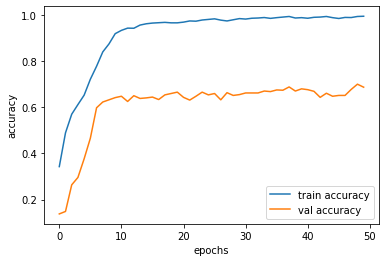

The validation accuracy is  70.03567218780518


In [100]:

epochs =list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label ='train accuracy')

plt.plot(epochs, val_acc, label ='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()


v1 = max(val_acc)
print("The validation accuracy is ",v1*100)



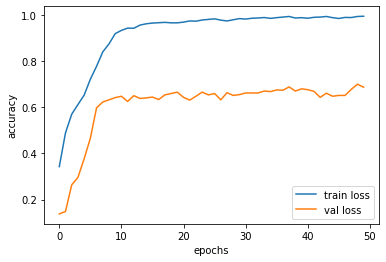

The validation loss is  2.0165741443634033


In [101]:

epochs =list(range(50))
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, acc, label ='train loss')

plt.plot(epochs, val_acc, label ='val loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()


l2 = max(val_loss)
print("The validation loss is ",l2)
